# Opportunity Diagnostics

Characterize the development potential and socioeconomic profile within 1–2 miles of Diridon Station to support transit-oriented development planning and opportunity analysis.

In [12]:
#%pip install geopandas pandas matplotlib numpy 
#%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
# -----------------------------------------------------
# Step 1: Load Data
# -----------------------------------------------------
from diridon_utils import *

parcels, tracts = load_data()

In [23]:
parcels["zoning"].unique()

array(['Other', 'Transit Residential', 'Unknown', 'Urban Residential', 'Mixed Use Commercial', 'Urban Village',
       'Municipal/Neighborhood Mixed Use', 'Urban Village Commercial'], dtype=object)

In [14]:
# ---------------------------------------------
# Step 2: Reproject
# ---------------------------------------------
# make sure 
parcels_m, tracts_m = reproject_for_buffering(parcels, tracts)


In [15]:
# ---------------------------------------------
# Step 3: Build Diridon Buffers
# ---------------------------------------------
diridon_m, buffer_1m, buffer_2m = build_diridon_buffers()

In [16]:
# ---------------------------------------------
# Step 4: Parcel Summary
# ---------------------------------------------
within_1m, uv, parcel_summary = summarize_parcels(parcels, buffer_1m)

In [17]:
# ---------------------------------------------
# Step 5: ACS Summary
# ---------------------------------------------
acs_cols = {
    "pct_poverty": "pct_poverty",
    "median_income": "median_income",
    "pct_renters": "pct_renters"
}
tracts_sel, acs_summary = summarize_acs(tracts_m, buffer_2m, acs_cols)


✓ Map saved to: ../output/maps/diridon_buffer_map.png
✓ Zoning breakdown:
  - Urban Village: 51 parcels
  - Urban Village Commercial: 18 parcels
  - Urban Residential: 24 parcels
  - Transit Residential: 53 parcels
  - Mixed Use Commercial: 45 parcels
  - Municipal/Neighborhood Mixed Use: 40 parcels
Map saved to: ../output/maps/diridon_buffer_map.png


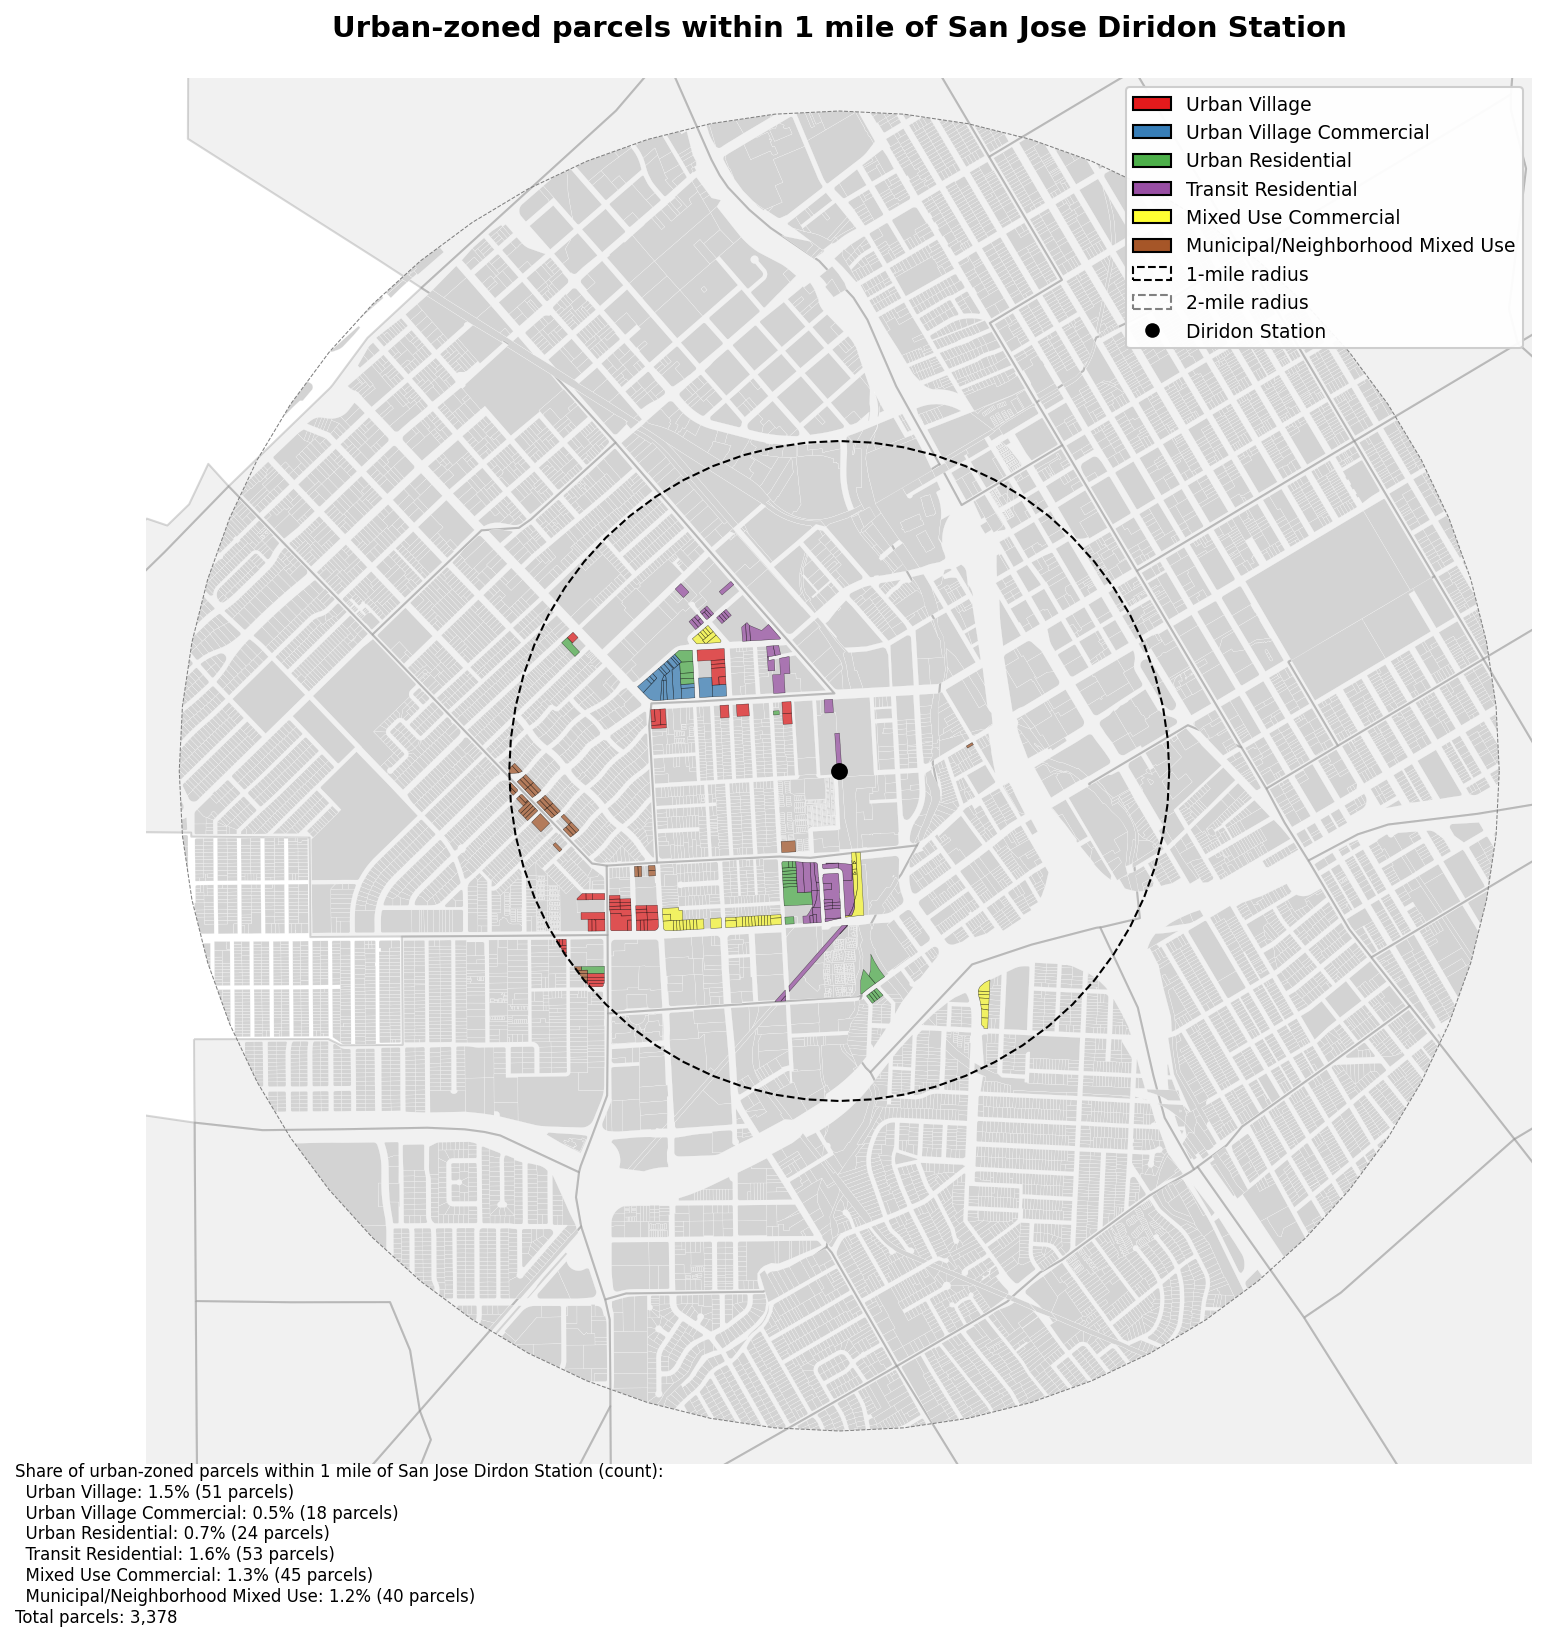

In [35]:
# ---------------------------------------------
# Step 6: Maps
# ---------------------------------------------
from diridon_utils import create_maps

map_path = create_maps(parcels, tracts, "../output/maps")
print(f"Map saved to: {map_path}")

from IPython.display import Image
Image(filename=map_path)

In [22]:
# ---------------------------------------------
# Step 7: Export Outputs
# ---------------------------------------------
export_outputs(within_1m, uv, tracts_sel, acs_summary, "../data/processed")

{'parcels_1m': PosixPath('../data/processed/diridon_parcels_1mile.parquet'),
 'uv_1m': PosixPath('../data/processed/diridon_uv_parcels_1mile.parquet'),
 'acs_summary': PosixPath('../data/processed/diridon_acs_2mile_summary.csv')}

In [10]:
parcels["ZONING"]

0         A(PD)
1         A(PD)
2         A(PD)
3         A(PD)
4         A(PD)
          ...  
224903    A(PD)
224904    A(PD)
224905    A(PD)
224906    R-1-8
224907    R-1-8
Name: ZONING, Length: 224908, dtype: object